<a href="https://colab.research.google.com/github/gosaitos/Computer_vision/blob/main/Image_transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Transformation:

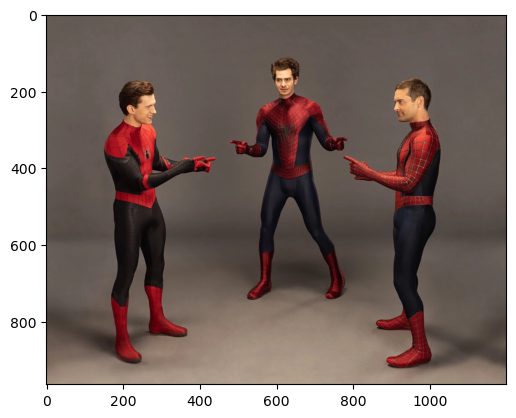

(964, 1200, 3)

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread

img = imread("spidy.jpg")

plt.imshow(img)
plt.show()
img.shape

### 1 .  Translation

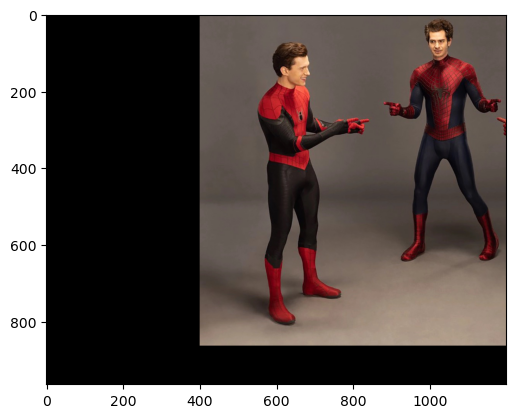

In [ ]:
tx = 400
ty = -100

height,width,_ = img.shape
res = np.zeros_like(img)
for y in range(height):
    for x in range(width):
        new_x = x + tx
        new_y = y + ty

        if 0 <= new_x < width and 0 <= new_y < height:
            res[new_y,new_x] = img[y,x]

plt.imshow(res)
plt.show()

### 2.Rotation

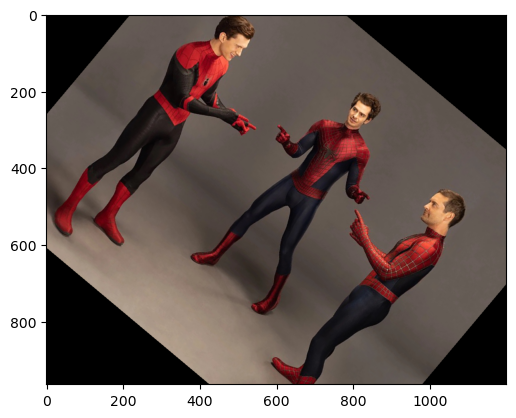

In [ ]:
deg = 320
height, width , _ = img.shape
ang = np.radians(deg)
cent_x, cent_y = width // 2, height // 2
res = np.zeros_like(img)
for new_y in range(height):
    for new_x in range(width):
        dx = new_x - cent_x
        dy = new_y - cent_y

        orig_x = int(dx * np.cos(ang) - dy * np.sin(ang) + cent_x)
        orig_y = int(dx * np.sin(ang) + dy * np.cos(ang) + cent_y)

        if 0 <= orig_x < width and 0 <= orig_y < height:
            res[new_y, new_x] = img[orig_y, orig_x]

plt.imshow(res)
plt.show()

### 3. Scale

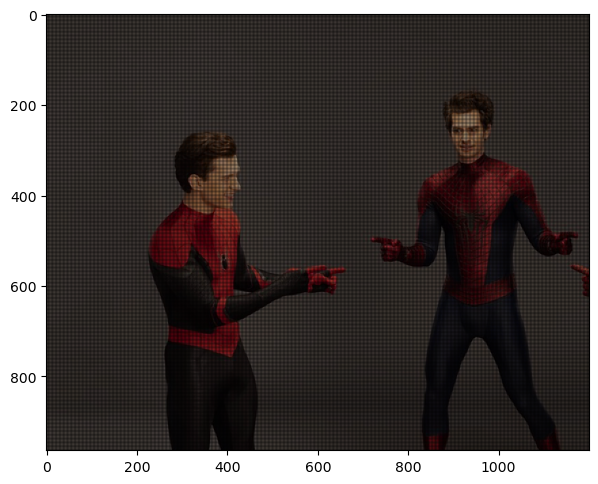

(964, 1200, 3)

In [ ]:
def affine_transform(image, matrix):
    height, width = image.shape[:2]
    transformed_image = np.zeros_like(image)

    for y in range(height):
        for x in range(width):
            # Apply affine transformation matrix
            new_x = int(matrix[0, 0] * x + matrix[0, 1] * y + matrix[0, 2])
            new_y = int(matrix[1, 0] * x + matrix[1, 1] * y + matrix[1, 2])

            # Check bounds
            if 0 <= new_x < width and 0 <= new_y < height:
                transformed_image[new_y, new_x] = image[y, x]

    return transformed_image
scaling_mat = np.array([[1.5, 0, 0], [0, 1.5, 0]], dtype=np.float32)
scaled_img = affine_transform(img, scaling_mat)

plt.figure(figsize=(7, 7))
plt.imshow(scaled_img)
plt.show()
scaled_img.shape

### 4.Reflection


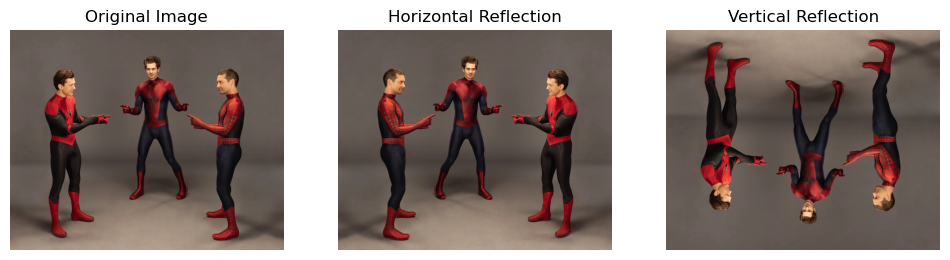

In [ ]:
height, width, channels = img.shape
horizontal_flip_manual = np.zeros_like(img)

for i in range(height):
    for j in range(width):
        horizontal_flip_manual[i, j] = img[i, width - j - 1]

vertical_flip_manual = np.zeros_like(img)

for i in range(height):
    for j in range(width):
        vertical_flip_manual[i, j] = img[height - i - 1, j]

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(horizontal_flip_manual)
plt.title("Horizontal Reflection")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(vertical_flip_manual)
plt.title("Vertical Reflection")
plt.axis('off')

plt.show()

### 6.Shearing

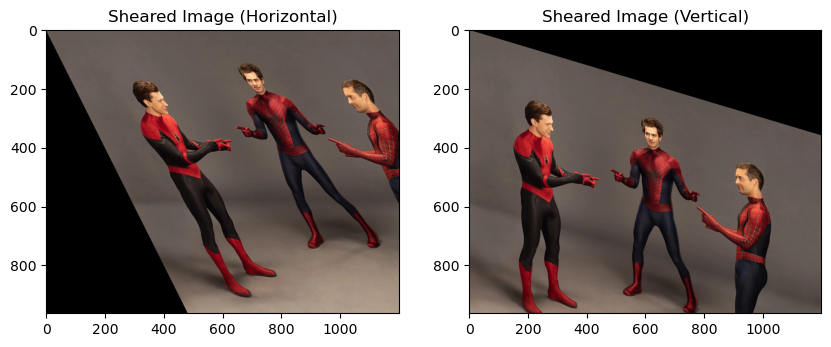

In [ ]:
Sh_x = 0.5
Sh_y = 0.3
sheared_img = np.zeros_like(img)

for i in range(h):
    for j in range(w):
        new_x = int(j + Sh_x * i)
        new_y = i
        if 0 <= new_x < w and 0 <= new_y < h:
            sheared_img[new_y, new_x] = img[i, j]

sheared_img_vertical = np.zeros_like(img)

for y in range(h):
    for x in range(w):
        new_y = int(y + Sh_y * x)
        if 0 <= new_y < h:
            sheared_img_vertical[new_y, x] = img[y, x]

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(sheared_img)
plt.title("Sheared Image (Horizontal)")
plt.subplot(1, 2, 2)
plt.imshow(sheared_img_vertical)
plt.title("Sheared Image (Vertical)")
plt.show()